# Step 1: Load CIFAR-10 Dataset

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to categorical
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 171s 1us/step


# Step 2: Define the ANN Model with Different Weight Initializers

In [2]:
def create_ann_model(initializer):
    model = Sequential([
        Flatten(input_shape=(32, 32, 3)),  # Convert 32x32x3 image to a vector
        Dense(512, activation='relu', kernel_initializer=initializer),
        Dense(256, activation='relu', kernel_initializer=initializer),
        Dense(128, activation='relu', kernel_initializer=initializer),
        Dense(10, activation='softmax')  # Output layer with softmax for classification
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])
    return model

# Step 3: Train Models with Different Initializers

In [3]:
# Initializers
initializers = {
    'He': 'he_uniform',
    'LeCun': 'lecun_uniform',
    'Xavier': 'glorot_uniform'
}

history_dict = {}

for name, init in initializers.items():
    print(f"\nTraining model with {name} initialization...")
    model = create_ann_model(init)
    history = model.fit(x_train, y_train, epochs=10, batch_size=128, 
                        validation_data=(x_test, y_test), verbose=1)
    history_dict[name] = history


Training model with He initialization...


c:\Users\Abuzar\miniconda3\envs\ML\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 19s 39ms/step - accuracy: 0.2657 - loss: 2.0676 - val_accuracy: 0.3750 - val_loss: 1.7437
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - accuracy: 0.3872 - loss: 1.7068 - val_accuracy: 0.4061 - val_loss: 1.6434
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.4231 - loss: 1.6184 - val_accuracy: 0.4309 - val_loss: 1.5784
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.4449 - loss: 1.5463 - val_accuracy: 0.4665 - val_loss: 1.4993
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.4669 - loss: 1.4929 - val_accuracy: 0.4487 - val_loss: 1.5272
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - accuracy: 0.4696 - loss: 1.4654 - val_accuracy: 0.4724 - val_loss: 1.4862
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - accuracy: 0.4893 - loss: 1.4266 - val_accuracy: 0.4857 - val_loss: 1.4613
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.5016 - loss: 1.3998 - 

# Step 4: Visualize the Training Results

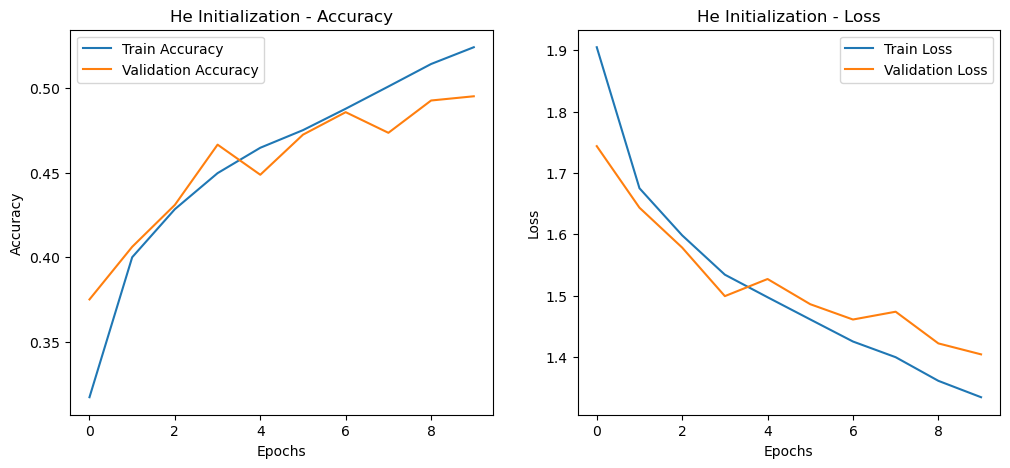

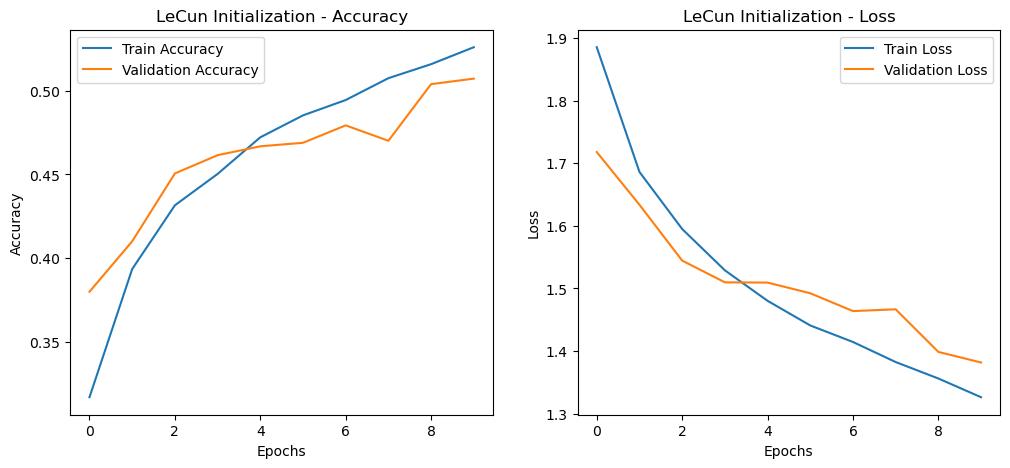

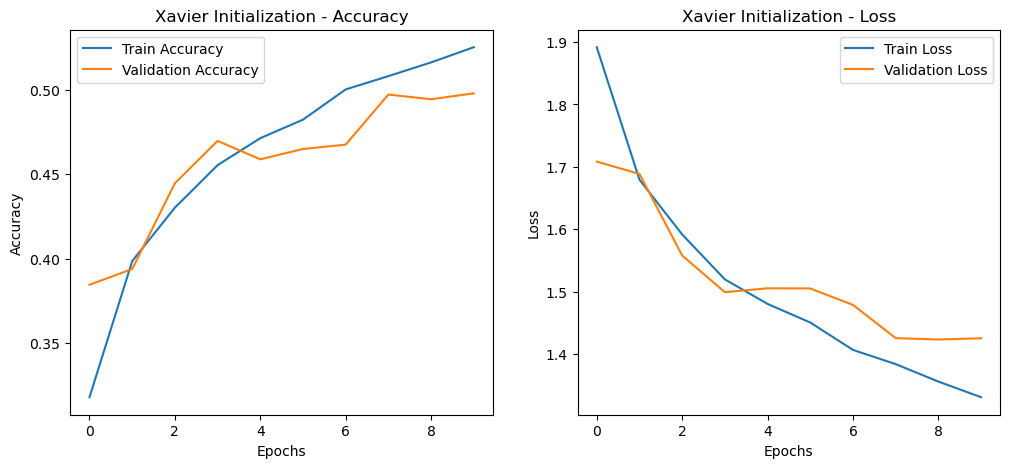

In [4]:
def plot_results(history, title):
    plt.figure(figsize=(12, 5))

    # Plot Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Visualize results for each initializer
for name, hist in history_dict.items():
    plot_results(hist, f"{name} Initialization")


# Step 5: Compare Initializers using Accuracy & Loss Graphs

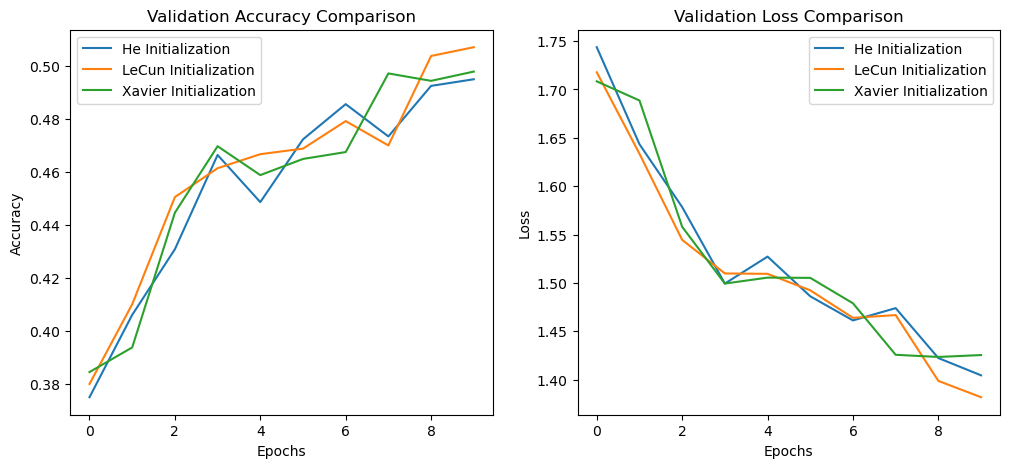

In [5]:
plt.figure(figsize=(12, 5))

# Plot Accuracy
plt.subplot(1, 2, 1)
for name, hist in history_dict.items():
    plt.plot(hist.history['val_accuracy'], label=f'{name} Initialization')
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
for name, hist in history_dict.items():
    plt.plot(hist.history['val_loss'], label=f'{name} Initialization')
plt.title('Validation Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
